##  [YOLOV5 in PyTorch](https://pytorch.org/hub/ultralytics_yolov5/)

## 載入套件

In [1]:
import torch

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 檢查 GPU

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

## 載入模型

In [3]:
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).to(device)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./best.pt').to(device)
# model img size input = 32

# model.conf = 0.4  # confidence threshold (0-1)
# model.iou = 0.5  # NMS IoU threshold (0-1)
# model.classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs
# model.agnostic_nms = False  # class-agnostic NMS
# model.half()  # to FP16
# # model.eval()


Using cache found in C:\Users\sharpaste/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-31 Python-3.10.2 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## 預測

In [23]:
# 批次處理
imgs = ['https://ultralytics.com/images/zidane.jpg', 
        './images_Object_Detection/latte.jpg',
        'https://kahwati.co.uk/wp-content/uploads/2022/10/Difference-between-Latte-Cappuccino-and-Espresso-Complete-Guide.jpg']  

# img size reset to 32, 

# 預測
results = model(imgs, size=64)

# 輸出結果
results.print()

image 1/3: 720x1280 (no detections)
image 2/3: 640x640 (no detections)
image 3/3: 1080x1920 1 latte
Speed: 1265.7ms pre-process, 6.3ms inference, 2.7ms NMS per image at shape (3, 3, 64, 64)


## 預測結果存檔

In [9]:
results.save()

OSError: [Errno 22] Invalid argument: 'runs\\detect\\exp60\\images?q=tbn:ANd9GcTb5De2fy2VuEtWmSD3Z3hnKgxz3MbImZM82g&usqp=CAU.jpg'

## 顯示結果

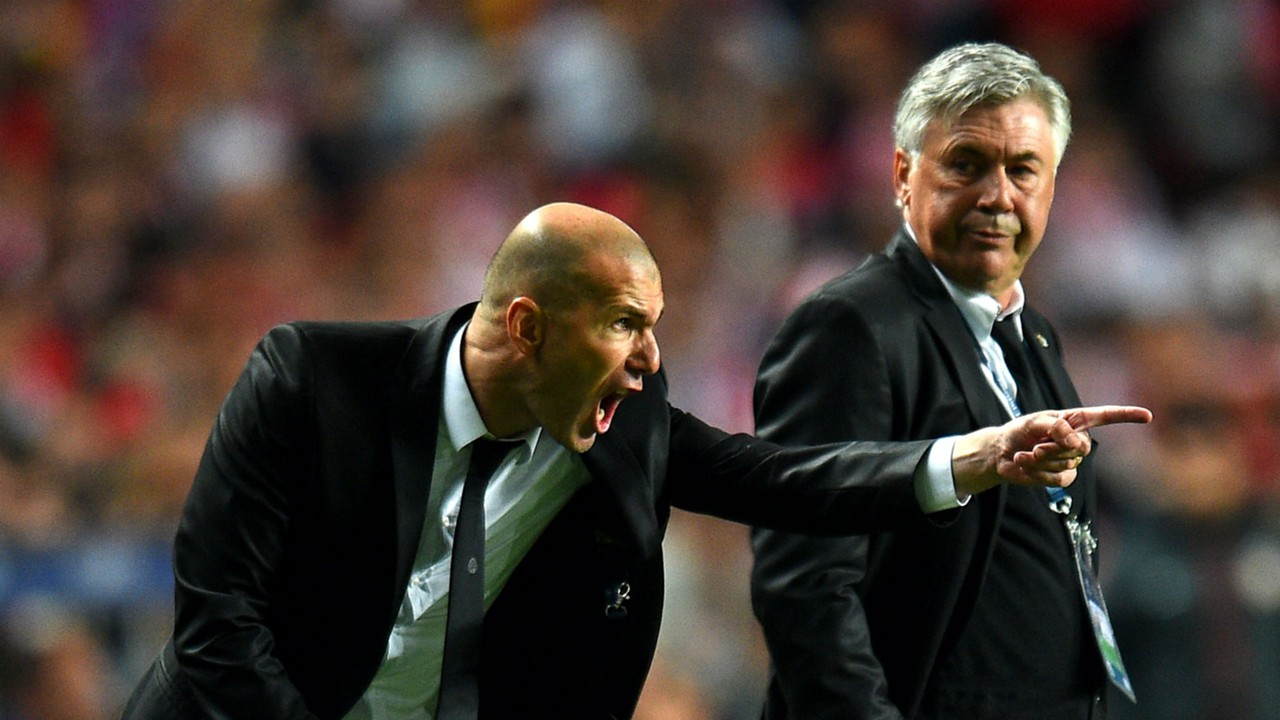

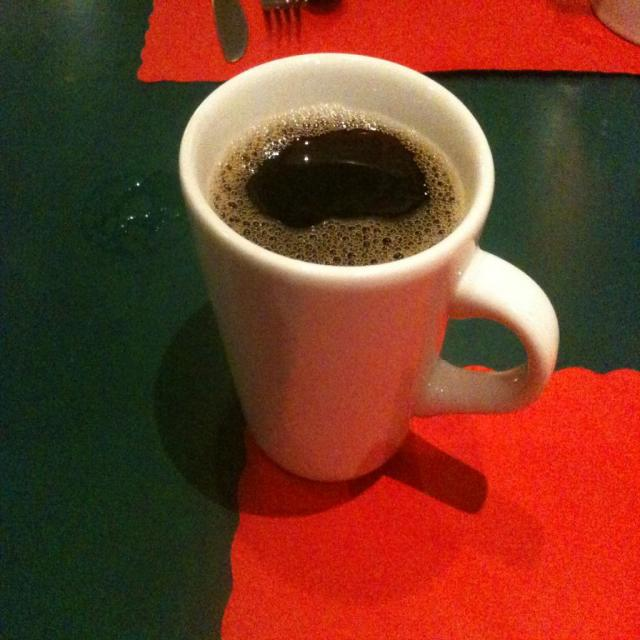

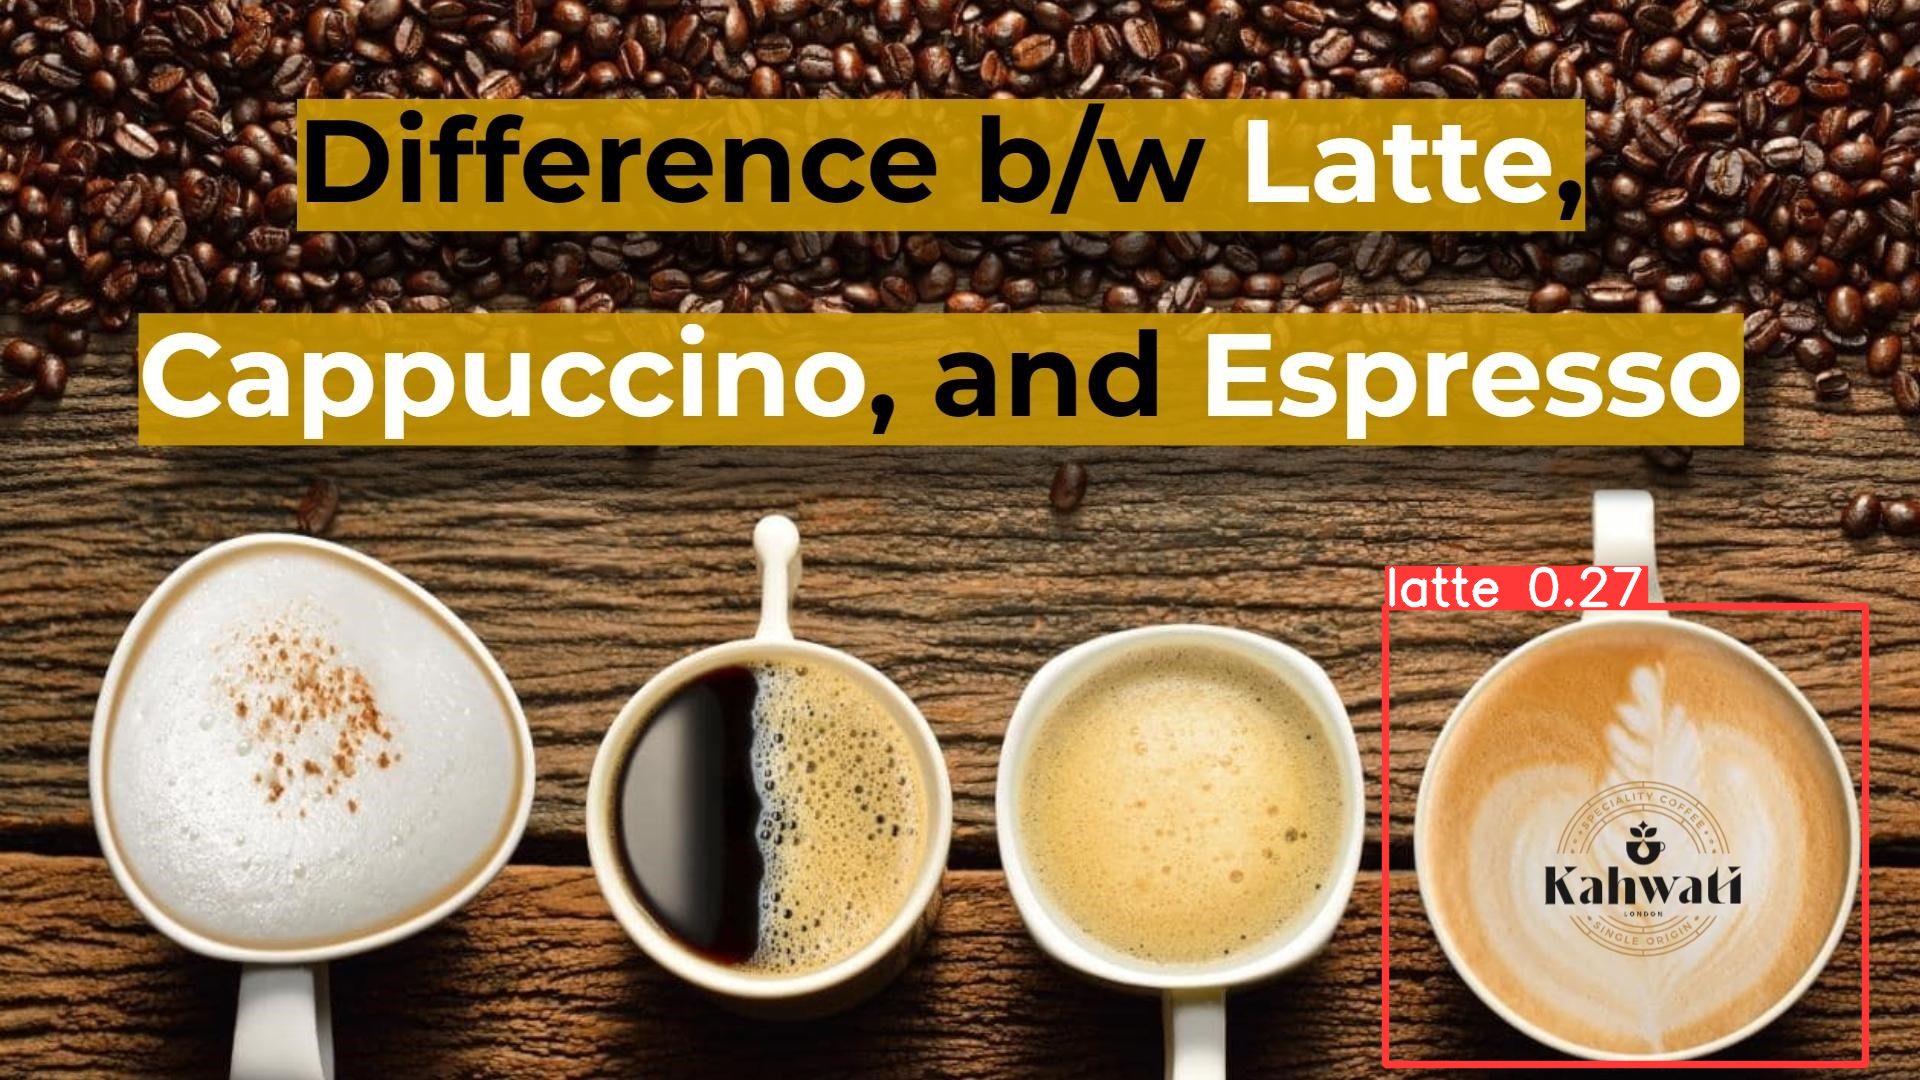

In [24]:
results.show()

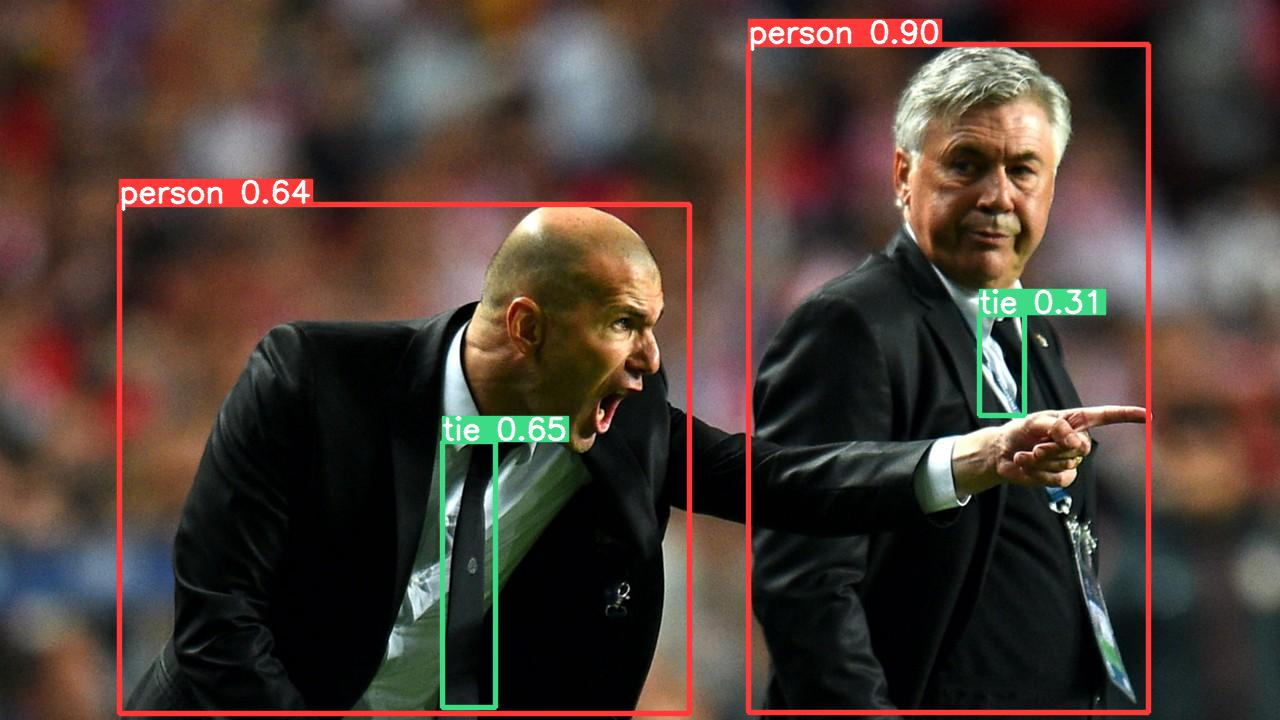

In [20]:
from IPython.display import Image
Image('./runs/detect/exp/zidane.jpg')

## 顯示定界框及預測機率

In [11]:
results.xyxy[0]

tensor([[7.48803e+02, 4.40130e+01, 1.14830e+03, 7.12668e+02, 8.95477e-01, 0.00000e+00],
        [4.42367e+02, 4.41503e+02, 4.95208e+02, 7.07937e+02, 6.54113e-01, 2.70000e+01],
        [1.19068e+02, 2.04798e+02, 6.89025e+02, 7.13420e+02, 6.38219e-01, 0.00000e+00],
        [9.79523e+02, 3.14562e+02, 1.02491e+03, 4.15584e+02, 3.06895e-01, 2.70000e+01]], device='cuda:0')

## 以表格顯示定界框、預測機率及類別

In [12]:
results.pandas().xyxy[0]

xmin        ymin         xmax        ymax  confidence  class    name
0  748.802979   44.012970  1148.298828  712.668213    0.895477      0  person
1  442.367432  441.502533   495.208191  707.936646    0.654113     27     tie
2  119.068115  204.798157   689.025391  713.420105    0.638219      0  person
3  979.523438  314.562134  1024.912598  415.583679    0.306895     27     tie